# Gaussian Langevin eq.

In [1]:
import pylab as plt
import numpy as np
import time as tm 
from sys import argv

### Definitions and functions


In [2]:
# Harmonic force

def force(x, *args):
    x0 = 0.
    ks = args[0]
    f = -ks*(x)
    return f


# Return the time lenght

def Time_len(tMax, dt):

    t = 0
    L = []
    
    while(t<tMax):
        L.append(t)
        t += dt

    return len(L)

### Stochastic evolution BAOAB

for further explanation, read: https://aip.scitation.org/doi/abs/10.1063/1.4802990

In [3]:
def position_update(x,v,dt):
    x_dt = x + v*dt/2.
    return x_dt

def velocity_update(v,F,dt):
    v_dt = v + F*dt/2.
    return v_dt

def random_velocity_update(v,gamma,kBT,dt):
    R = np.random.normal()
    c1 = np.exp(-gamma*dt)
    c2 = np.sqrt(1-np.exp(-2*gamma*dt))*np.sqrt(kBT)
    v_dt = c1*v + c2*R
    return v_dt


def BAOAB_method(x_init, v_init, tMax, dt, gamma, kBT, ks):
    
    x = x_init
    v = v_init
    t = 0
    pos = []
    time = []
    
    while(t<tMax):
        
        # part B
        F = force(x, ks)
        v = velocity_update(v,F,dt)
        
        # part a
        x = position_update(x,v,dt)
        
        # part O
        v = random_velocity_update(v,gamma,kBT,dt)
        
        # part A
        x = position_update(x,v,dt)
    
        # part B
        F = force(x, ks)
        v = velocity_update(v,F,dt)
        
        pos.append(x)
        time.append(t)
        
        t += dt
    
    return time, pos 

### Time evolution for position $x$

In [4]:
###################### MAIN #############################

# Parameters and time

ks = 2
gamma = 1 #gamma**2 >> 4*k overdamped
kBT = 1.0

dt = 0.01
tMax = 50

# Sample conditions

N = 10**4 #int(argv[1])
x_init = 0.3
v_init = 0.

####################################

# Extras

M_x = np.zeros(Time_len(tMax, dt))
M_x2 = np.zeros(Time_len(tMax, dt))

#########################################################

start = tm.time()

# Stochastic evolution for each in the sample

for ii in range(N):    

    time, position = BAOAB_method(x_init, v_init, tMax, dt, gamma, kBT, ks)
        
    M_x = M_x + np.array(position)
    M_x2 = M_x2 + np.power(position,2)

t = np.array(time)


### Statistics

# Mean
M_x = M_x/N
M_x2 = M_x2/N

# Variance
Var_x = M_x2 - M_x**2

#########################################################

end = tm.time()
print(end-start)

816.0889053344727


### Exporting or getting data


In [5]:
############ Exporting data ################

#output = np.array([M_x2, M_x, t])

#data_path = "/home/fariaart/Dropbox/data_%s.txt" %N
#data_path = "/home/des01/mbonanca/fariaart/Resultados/Doutorado/Lutz/over_data_%s.txt" %N
#with open(data_path , "w+") as data:
    #np.savetxt(data, output.T, fmt='%f')


### Plots of 

* Mean value $\langle x \rangle$
* Variance $\left<x^2\right> - \left<x\right>^2$

<Figure size 432x288 with 0 Axes>

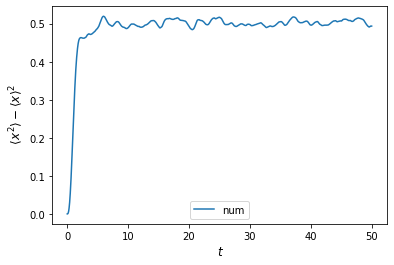

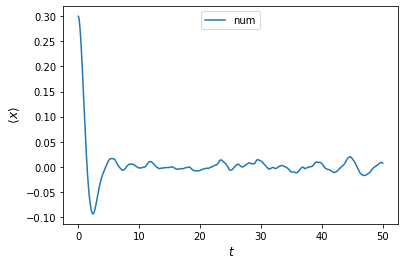

<Figure size 432x288 with 0 Axes>

In [6]:
############ Plotting data ################

# Variance plot

plt.plot(t, Var_x, label= 'num' )

plt.ylabel(r' $\left<x^2\right> - \left<x\right>^2$', fontsize = 12)
plt.xlabel(r' $t$', fontsize = 12)

plt.legend(loc='lower center')
#plt.savefig('/home/fariaart/Dropbox/Pesquisa/Doutorado/Lutz/figuras/var_mean_over_kk/HO_brown/under_2_1.png', transparent=False)
plt.figure()


# Mean value plot

plt.plot(t, M_x, label= 'num' )

plt.ylabel(r' $\left<x\right> $', fontsize = 12)
plt.xlabel(r' $t$', fontsize = 12)
#plt.ylim(-0.07,0.07)

plt.legend(loc='upper center')
#plt.savefig('/home/fariaart/Dropbox/Pesquisa/Doutorado/Lutz/figuras/var_mean_over_kk/HO_brown/under_2_2.png', transparent=False)
plt.figure()